In [1]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import FID_util
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Set seed here
seed = 123459
torch.manual_seed(seed)

plot_path = "./plots/FID_diffusion_image/"

## Data Sets

In [2]:
CIFAR_train_loader = DataLoader(datasets.CIFAR10('./data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.PILToTensor()])), batch_size=10000, shuffle=True)

CIFAR_train = FID_util.load_data_single(CIFAR_train_loader, 10000, (32, 32))
CIFAR_generated = FID_util.load_from_dir("./diffusion_images/cifar_generated/*.png")
print(f"Base FID CIFAR-10: {FID_util.compute_FID(CIFAR_train, CIFAR_generated).item()}")

Files already downloaded and verified
Base FID CIFAR-10: 17.56197166442871


In [3]:
CelebA_train = FID_util.load_from_dir("./data/celeba_hq_256/*.jpg", seed)
CelebA_generated = FID_util.load_from_dir("./diffusion_images/celebA_generated/*.png")
print(f"Base FID CelebA-HQ DDIM: {FID_util.compute_FID(CelebA_train, CelebA_generated, batch_num=125).item()}")
CelebA_ldm_generated = FID_util.load_from_dir("./diffusion_images/celebA_ldm_generated/*.png")
print(f"Base FID CelebA-HQ LDM: {FID_util.compute_FID(CelebA_train, CelebA_ldm_generated, batch_num=125).item()}")

Base FID CelebA-HQ DDIM: 21.09842300415039
Base FID CelebA-HQ LDM: 25.89986801147461


## Gamma Correction

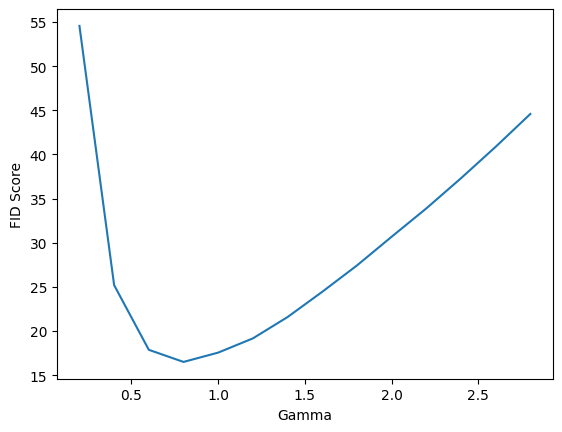

In [4]:
gamma_array = np.arange(0.2, 3.0, 0.2)
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CIFAR_train, CIFAR_generated)
plt.savefig(plot_path + "g_CIFAR_gamma_fid_scores")

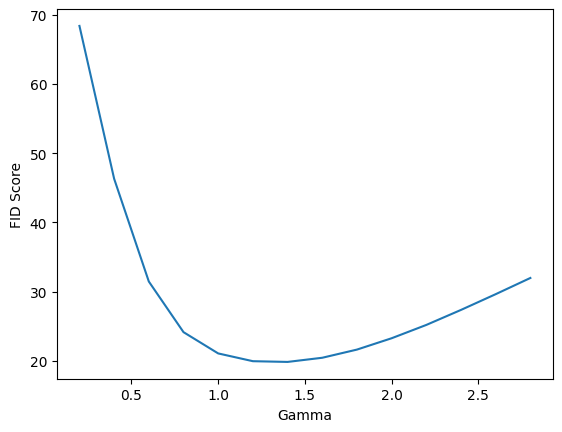

In [5]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CelebA_train, CelebA_generated, batch_num=125)
plt.savefig(plot_path + "g_CelebA_gamma_fid_scores")

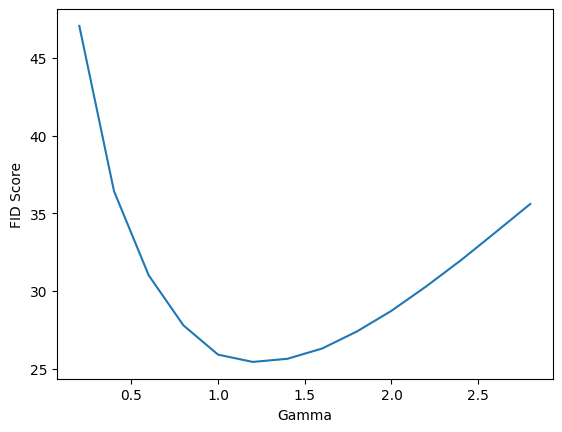

In [6]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_gamma, "Gamma", CelebA_train, CelebA_ldm_generated, batch_num=125)
plt.savefig(plot_path + "g_CelebA_ldm_gamma_fid_scores")

## Image Saturation

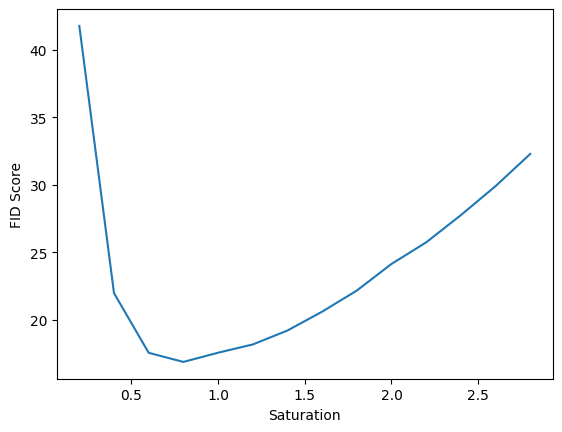

In [7]:
level_array = np.arange(0.2, 3.0, 0.2)
FID_util.plot_FID(level_array, transforms.functional.adjust_saturation, "Saturation", CIFAR_train, CIFAR_generated)
plt.savefig(plot_path + "g_CIFAR_saturation_fid_scores")

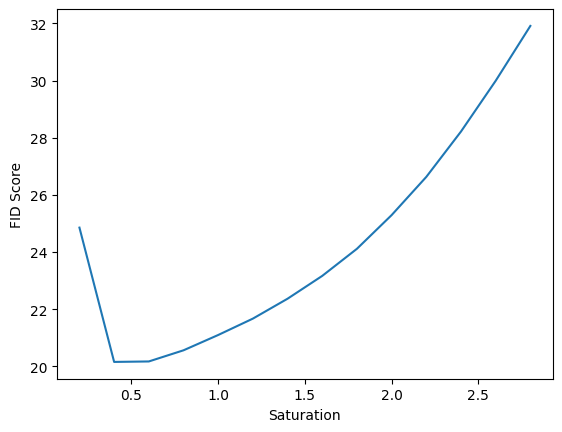

In [8]:
FID_util.plot_FID(level_array, transforms.functional.adjust_saturation, "Saturation", CelebA_train, CelebA_generated, batch_num=125)
plt.savefig(plot_path + "g_CelebA_saturation_fid_scores")

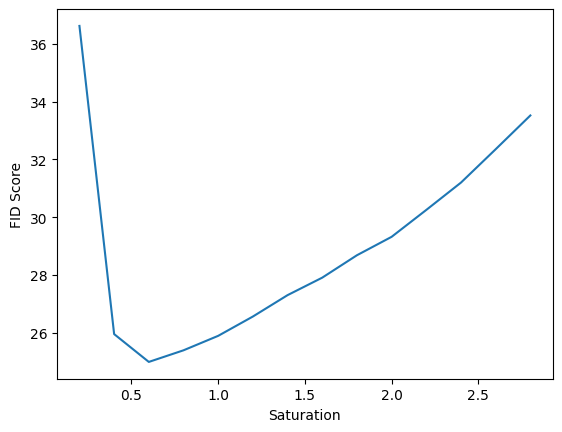

In [9]:
FID_util.plot_FID(gamma_array, transforms.functional.adjust_saturation, "Saturation", CelebA_train, CelebA_ldm_generated, batch_num=125)
plt.savefig(plot_path + "g_CelebA_ldm_saturation_fid_scores")

## Invert Image

In [10]:
print(f"FID of Inverted CIFAR: {FID_util.invert_FID(CIFAR_train, CIFAR_generated)}")

FID of Inverted CIFAR: 90.71028137207031


In [11]:
print(f"FID of Inverted CelebA DDIM: {FID_util.invert_FID(CIFAR_train, CelebA_generated, batch_num=125)}")

FID of Inverted CelebA DDIM: 290.8993225097656


In [12]:
print(f"FID of Inverted CelebA LDM: {FID_util.invert_FID(CIFAR_train, CelebA_ldm_generated, batch_num=125)}")

FID of Inverted CelebA LDM: 284.1780700683594


## Rotations

In [13]:
angles = [90, 180, 270]
for angle in angles:
    print(f"------- Rotation of {angle} degrees -------")
    print(f"CIFAR: {FID_util.compute_transform_FID(transforms.functional.rotate, angle, CIFAR_train, CIFAR_generated)}")
    print(f"CelebA DDIM: {FID_util.compute_transform_FID(transforms.functional.rotate, angle, CelebA_train, CelebA_generated, batch_num=125)}")
    print(f"CelebA LDM: {FID_util.compute_transform_FID(transforms.functional.rotate, angle, CelebA_train, CelebA_ldm_generated, batch_num=125)}")

------- Rotation of 90 degrees -------
CIFAR: 66.47956848144531
CelebA DDIM: 127.48043823242188
CelebA LDM: 121.37377166748047
------- Rotation of 180 degrees -------
CIFAR: 47.17453384399414
CelebA DDIM: 98.29412841796875
CelebA LDM: 107.90982055664062
------- Rotation of 270 degrees -------
CIFAR: 66.46041870117188
CelebA DDIM: 126.98731994628906
CelebA LDM: 120.62864685058594
